In [1]:
# Load the required library
import os
import pandas as pd
import numpy as np

In [2]:
# Read the auto_mpg data into dataframe
auto_mpg=pd.read_csv("/Users/manikantanvenkataraman/Downloads/auto-mpg.csv")
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Data prep - Drop column car name
auto_mpg.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'accelaration', 'model_year', 'origin', 'car_name']
auto_mpg=auto_mpg.drop(columns=['car_name'])
auto_mpg

,mpg,cylinders,displacement,horsepower,weight,accelaration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [4]:
# Datatype of fields
auto_mpg.dtypes
# Horsepower is string


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
accelaration    float64
model_year        int64
origin            int64
dtype: object

In [5]:
# Obtain unique values to check for invalid values
auto_mpg.horsepower.unique() 

# There are records with ? populated for horsepower

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
# Replace ? with mean value 
auto_mpg['horsepower'].replace(['?'], np.nan, inplace=True) # Replace ? with nan
auto_mpg.horsepower.unique() 
auto_mpg1=auto_mpg
auto_mpg1 = auto_mpg1.dropna() # Drop the null records
auto_mpg1['horsepower'] = auto_mpg1['horsepower'].astype(int) # convert the datatype to int
auto_mpg1.horsepower.mean() #Determine mean

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


104.46938775510205

In [7]:
auto_mpg['horsepower'] = auto_mpg['horsepower'].fillna(104) # Fill the null values with mean value
auto_mpg.horsepower.unique() # Nan replaced with mean value 104

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 104, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
# Create dummy variables for the field origin
auto_mpg[['origin_1', 'origin_2', 'origin_3']]=pd.get_dummies(auto_mpg.origin)
auto_mpg

,mpg,cylinders,displacement,horsepower,weight,accelaration,model_year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,2,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


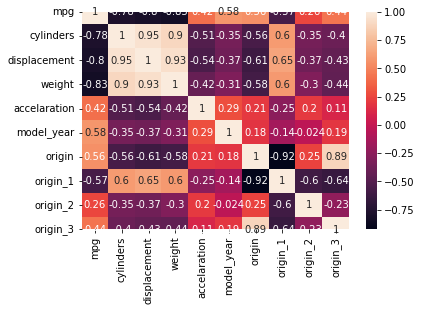

In [128]:
#correlation coefficient matrix

import seaborn as sns
import matplotlib.pyplot as plt

correlation_mat = auto_mpg.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

# mpg has strong negative correlation with weight, displcement,cylinders. 
# mpg value decreases with increase in value of cylinders, displcament & weight
# Rest of the attributes dont have strong correlation

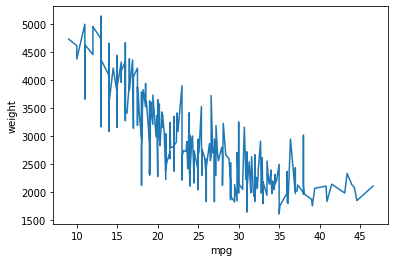

In [140]:
# Plot mpg vs weight to understand correlation
auto_mpg.sort_values(by=['mpg'], inplace=True)
plt.plot(auto_mpg.mpg, auto_mpg.weight)
plt.xlabel('mpg')
plt.ylabel('weight')
plt.show()

#The plot shows decrease in mpg with increase in weight showing strong negative correlation.

In [14]:
# Split the data into train and test

from sklearn.model_selection import train_test_split # Load the library
auto_mpg_train, auto_mpg_test = train_test_split(auto_mpg,test_size=0.20)
#test size helps determine the split percentage

In [15]:
auto_mpg_test
# Testing dataset has 80 records out of the 398 records in the complete dataset (20%)

,mpg,cylinders,displacement,horsepower,weight,accelaration,model_year,origin,origin_1,origin_2,origin_3
107,18.0,6,232.0,100,2789,15.0,73,1,1,0,0
349,34.1,4,91.0,68,1985,16.0,81,3,0,0,1
189,15.5,8,304.0,120,3962,13.9,76,1,1,0,0
273,23.9,4,119.0,97,2405,14.9,78,3,0,0,1
280,21.5,6,231.0,115,3245,15.4,79,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
208,13.0,8,318.0,150,3940,13.2,76,1,1,0,0
369,34.0,4,112.0,88,2395,18.0,82,1,1,0,0
251,20.2,8,302.0,139,3570,12.8,78,1,1,0,0
321,32.2,4,108.0,75,2265,15.2,80,3,0,0,1


In [16]:
auto_mpg_train

# Training dataset has 318 records out of the 398 records in the complete dataset (80%)

,mpg,cylinders,displacement,horsepower,weight,accelaration,model_year,origin,origin_1,origin_2,origin_3
253,20.5,6,200.0,95,3155,18.2,78,1,1,0,0
246,32.8,4,78.0,52,1985,19.4,78,3,0,0,1
72,15.0,8,304.0,150,3892,12.5,72,1,1,0,0
348,37.7,4,89.0,62,2050,17.3,81,3,0,0,1
271,23.2,4,156.0,105,2745,16.7,78,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
181,33.0,4,91.0,53,1795,17.5,75,3,0,0,1
150,26.0,4,108.0,93,2391,15.5,74,3,0,0,1
183,25.0,4,116.0,81,2220,16.9,76,2,0,1,0
372,27.0,4,151.0,90,2735,18.0,82,1,1,0,0


In [40]:
# Linear Regression between mpg and weight

from sklearn.linear_model import LinearRegression # Load library
x_train= auto_mpg_train.weight
y_train = auto_mpg_train.mpg
x_train= x_train.values.reshape(-1, 1) # Reshape the data
model = LinearRegression().fit(x_train, y_train)

In [41]:
# Intercept
model.intercept_

46.20002290323372

In [42]:
# Slope
model.coef_ 

array([-0.00765866])

In [43]:
# coefficient of determination - R2 on the training data
model.score(x_train, y_train)

# R2 indicates the percentage of data that fits the model. 
# Higher R2 indicates better fit.
# For the auto_mpg dataset, linear regression btw mpg-weight is 68.9% indicating 68.9 % fits the model 

0.6897232121279837

In [44]:
# coefficient of determination - R2 on the test data

x_test=auto_mpg_test.weight
x_test= x_test.values.reshape(-1, 1)
y_test=auto_mpg_test.mpg
model.score(x_test, y_test)

# R2 is slightly more in test data than the training data.

0.6987009536431557

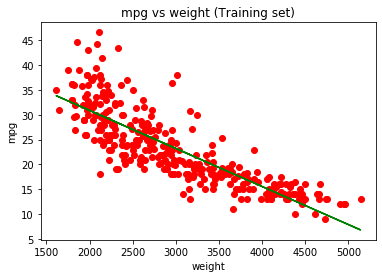

In [46]:
# Residual plot on training dataset

import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, model.predict(x_train), color = "green")
plt.title("mpg vs weight (Training set)")
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

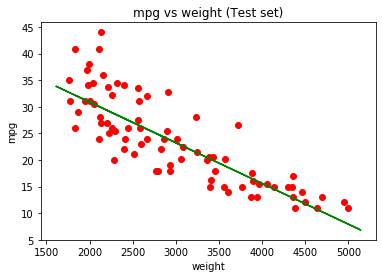

In [47]:
# Residual plot on testing dataset
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_train, model.predict(x_train), color = "green")
plt.title("mpg vs weight (Test set)")
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

In [48]:
# RMSE on training data set

from sklearn.metrics import mean_squared_error
import math

y_pred = model.predict(x_train)
MSE = mean_squared_error(y_train, y_pred) 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error of training data set:\n")
print(RMSE)

Root Mean Square Error:

4.293122035134267


In [51]:
# MAE on training data set
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_train, y_pred) 
print("Mean Absolute Error of training data set:\n")
print(MAE)

#The value predicted can have an error of 3 mpg.

Mean Absolute Error of training data set:

3.239960557281203


In [53]:
# RMSE on testing data set

y_pred = model.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error of training data set:\n")
print(RMSE)

Root Mean Square Error of training data set:

4.493762089931952


In [55]:
#MAE on testing data set

MAE = mean_absolute_error(y_test, y_pred) 
print("Mean Absolute Error of training data set:\n")
print(MAE)

Mean Absolute Error of training data set:

3.4767125837644173


#LASSO REGRESSION ANALYSIS

In [60]:
#Load library
from sklearn.linear_model import  Lasso
from sklearn.linear_model import  LassoCV

In [61]:
# Build the model with training dataset
lasso_model = Lasso().fit(x_train,y_train)

In [62]:
#Intercept
lasso_model.intercept_

46.195777396097725

In [64]:
#Slope
lasso_model.coef_ 

array([-0.00765723])

In [65]:
# coefficient of determination - R2 on the training data
lasso_model.score(x_train, y_train)

# R2 indicates the percentage of data that fits the model. 
# Higher R2 indicates better fit.
# For the auto_mpg dataset, lasso regression btw mpg-weight is 68.9% indicating 68.9 % fits the model 

0.6897231880269146

In [66]:
# coefficient of determination - R2 on the training data
lasso_model.score(x_test, y_test)

# R2 indicates the percentage of data that fits the model. 
# Higher R2 indicates better fit.

0.6986982677511557

In [68]:
# RMSE for Lasso regression model - training dataset

y_pred = lasso_model.predict(x_train)
MSE = mean_squared_error(y_train, y_pred) 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error of training data set:\n")
print(RMSE)

Root Mean Square Error of training data set:

4.293122201870602


In [70]:
# RMSE for Lasso regression model - test dataset

y_pred = lasso_model.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error of training data set:\n")
print(RMSE)

Root Mean Square Error of training data set:

4.493782119422411


In [73]:
# MAE on training data set
y_pred = lasso_model.predict(x_train)
MAE = mean_absolute_error(y_train, y_pred) 
print("Mean Absolute Error of training data set:\n")
print(MAE)


Mean Absolute Error of training data set:

3.239864350592473


In [74]:
# MAE on training data set

y_pred = lasso_model.predict(x_test)
MAE = mean_absolute_error(y_test, y_pred) 
print("Mean Absolute Error of training data set:\n")
print(MAE)

Mean Absolute Error of training data set:

3.476494777351782
